In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import outliers_influence
from sklearn.linear_model import LinearRegression
#(a)
np.random.seed(5)
predictor_primary = np.random.uniform(size=100)
predictor_secondary = 0.5 * predictor_primary + np.random.normal(size=100) / 10
outcome = 2 + 2 * predictor_primary + 0.3 * predictor_secondary + np.random.normal(size=100)
#(b)
np.corrcoef(predictor_primary, predictor_secondary)

array([[1.        , 0.81936924],
       [0.81936924, 1.        ]])

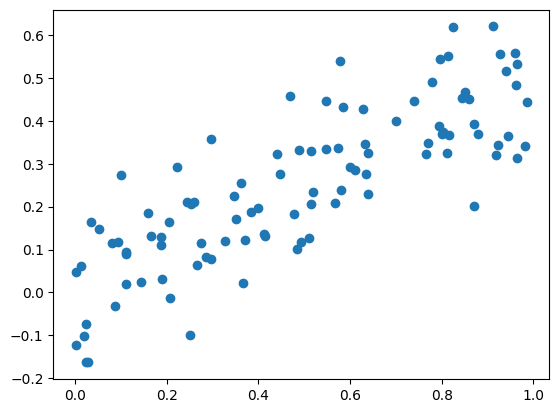

In [2]:
plt.scatter(predictor_primary, predictor_secondary)

In [3]:
#(c)
features = pd.DataFrame({'predictor_primary': predictor_primary, 'predictor_secondary': predictor_secondary})
features_with_intercept = sm.add_constant(features)

full_model = sm.OLS(outcome, features_with_intercept)
full_results = full_model.fit()
full_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     38.74
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           4.31e-13
Time:                        19:32:39   Log-Likelihood:                -123.67
No. Observations:                 100   AIC:                             253.3
Df Residuals:                      97   BIC:                             261.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8158      0.162     11.231      0.000       1.495       2.137
predictor_primary       2.0758      0.488      4.257      0.000       1.108       3.044
predictor_secondary     0.7584      0.817      0.929      0.355      -0.862       2.379
==============================================================================
Omnibus:                        0.718   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.574
Skew:                          -0.185   Prob(JB):                        0.750
Kurtosis:                       2.981   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the regression results, the estimated coefficients are:
- β̂₀ (const) = 1.8158
- β̂₁ (predictor_primary) = 2.0758
- β̂₂ (predictor_secondary) = 0.7584

These estimates are close to the true values (β₀ = 2, β₁ = 2, β₂ = 0.3). The intercept and primary predictor coefficient are slightly underestimated, while the secondary predictor coefficient is overestimated.

For hypothesis testing:
- For H₀: β₁ = 0, we can reject this null hypothesis as the p-value is 0.000 (highly significant) with t = 4.257.
- For H₀: β₂ = 0, we cannot reject this null hypothesis as the p-value is 0.355 (not significant) with t = 0.929.

In [ ]:
#(d)
sklearn_model = LinearRegression()
sklearn_fit = sklearn_model.fit(features_with_intercept, outcome)
sklearn_fit.coef_

primary_only = pd.DataFrame({'predictor_primary': predictor_primary})
primary_only_with_intercept = sm.add_constant(primary_only)
primary_model = sm.OLS(outcome, primary_only_with_intercept)
primary_results = primary_model.fit()
print(primary_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     76.72
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           5.93e-14
Time:                        19:33:53   Log-Likelihood:                -124.11
No. Observations:                 100   AIC:                             252.2
Df Residuals:                      98   BIC:                             257.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8229      0.16

Using only the primary predictor (x1), the estimated coefficients are:
- β̂₀ = 1.8229
- β̂₁ = 2.4468

The coefficient for the primary predictor has increased compared to the full model, likely absorbing some of the effect from the omitted variable. The R-squared (0.439) is only slightly lower than the full model (0.444), suggesting x1 alone explains nearly as much variance as both predictors together.

We can confidently reject the null hypothesis H₀: β₁ = 0, with a highly significant p-value of 0.000 and t = 8.759. The primary predictor is strongly associated with the outcome even when used alone.

In [5]:
#(e)
secondary_only = pd.DataFrame({'predictor_secondary': predictor_secondary})
secondary_only_with_intercept = sm.add_constant(secondary_only)
secondary_model = sm.OLS(outcome, secondary_only_with_intercept)
secondary_results = secondary_model.fit()
print(secondary_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     50.53
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.92e-10
Time:                        19:39:09   Log-Likelihood:                -132.23
No. Observations:                 100   AIC:                             268.5
Df Residuals:                      98   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1250    

## Question (e)

When fitting a regression model using only the secondary predictor (x2), the estimated coefficients are:
- β̂₀ = 2.1250
- β̂₁ = 3.6070

These results are quite interesting. Despite β2 not being significant in the full model (question c), when used alone, the secondary predictor becomes highly significant with a p-value of 0.000 and t = 7.108.

The coefficient estimate (3.6070) is much larger than the true value of 0.3, indicating substantial bias. This is likely due to omitted variable bias - since x2 is correlated with x1 (they were generated with correlation), and x1 has a strong effect on y, the model attributes much of x1's effect to x2 when x1 is omitted.

The R-squared (0.340) is lower than both the full model (0.444) and the x1-only model (0.439), suggesting that x2 alone explains less variance than x1 alone.

We can confidently reject the null hypothesis H₀: β₁ = 0 (where β₁ now refers to the coefficient of x2 in this single-predictor model), as the p-value is 0.000, indicating strong statistical significance.

This illustrates why examining predictors in isolation can be misleading when predictors are correlated - a phenomenon commonly observed in multicollinearity situations.

## Question F
They do not contradict with each other

### Explanation:
These results don't contradict each other but rather illustrate the consequences of correlated predictors. Since x1 and x2 are correlated (x2 was generated as 0.5*x1 plus noise), they share explanatory power:

1. **Shared variance explanation**: When both variables are included (model c), they compete to explain the same variation in y. Since x1 has a stronger true relationship with y (β₁=2 vs β₂=0.3), it "wins" this competition, making x2 appear insignificant.

2. **Omitted variable bias**: When x1 is omitted (model e), x2 serves as a proxy for both its own effect and x1's effect. The inflated coefficient (3.6070) reflects both the direct effect of x2 and the indirect effect it's capturing from the omitted x1.

3. **Model comparison**: The R-squared values support this interpretation:
   - Full model (c): R² = 0.444
   - x1 only (d): R² = 0.439
   - x2 only (e): R² = 0.340
   
   The minimal decrease in R² when dropping x2 (0.444 → 0.439) confirms x2 adds little unique information, while the larger drop when using only x2 (0.444 → 0.340) shows it cannot fully substitute for x1.

Rather than contradicting each other, these results demonstrate why it's important to consider multicollinearity when interpreting regression coefficients, and why significant variables in simple regression might become insignificant in multiple regression (or vice versa).

In [20]:
from statsmodels.stats.outliers_influence import OLSInfluence
# Adding the mismeasured observation
predictor_primary = np.append(predictor_primary, 0.1)
predictor_secondary = np.append(predictor_secondary, 0.8)
outcome = np.append(outcome, 6)

# (c) Re-fitting model with both predictors
features = pd.DataFrame({'predictor_primary': predictor_primary, 'predictor_secondary': predictor_secondary})
features_with_intercept = sm.add_constant(features)

full_model = sm.OLS(outcome, features_with_intercept)
full_results = full_model.fit()
print(full_results.summary())

# Calculate influence measures for model (c)
influence_c = OLSInfluence(full_results)
leverage_c = influence_c.hat_matrix_diag
resid_c = full_results.resid
student_resid_c = influence_c.resid_studentized_internal

# Print influence statistics for the new point (last observation)
print("Model (c) - New observation statistics:")
print(f"Leverage: {leverage_c[-1]:.4f}")
print(f"Is high leverage: {leverage_c[-1] > 2*(features.shape[1]+1)/len(predictor_primary)}")

# (d) Re-fitting model with x1 only
primary_only = pd.DataFrame({'predictor_primary': predictor_primary})
primary_only_with_intercept = sm.add_constant(primary_only)

primary_model = sm.OLS(outcome, primary_only_with_intercept)
primary_results = primary_model.fit()
print(primary_results.summary())

# Calculate influence measures for model (d)
influence_d = OLSInfluence(primary_results)
leverage_d = influence_d.hat_matrix_diag
resid_d = primary_results.resid
student_resid_d = influence_d.resid_studentized_internal

# Print influence statistics for the new point
print("Model (d) - New observation statistics:")
print(f"Leverage: {leverage_d[-1]:.4f}")
print(f"Is high leverage: {leverage_d[-1] > 2*(primary_only.shape[1]+1)/len(predictor_primary)}")

# (e) Re-fitting model with x2 only
secondary_only = pd.DataFrame({'predictor_secondary': predictor_secondary})
secondary_only_with_intercept = sm.add_constant(secondary_only)

secondary_model = sm.OLS(outcome, secondary_only_with_intercept)
secondary_results = secondary_model.fit()
print(secondary_results.summary())

# Calculate influence measures for model (e)
influence_e = OLSInfluence(secondary_results)
leverage_e = influence_e.hat_matrix_diag
resid_e = secondary_results.resid
student_resid_e = influence_e.resid_studentized_internal

# Print influence statistics for the new point
print("Model (e) - New observation statistics:")
print(f"Leverage: {leverage_e[-1]:.4f}")
print(f"Is high leverage: {leverage_e[-1] > 2*(secondary_only.shape[1]+1)/len(predictor_primary)}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     86.83
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           2.36e-23
Time:                        19:55:05   Log-Likelihood:                -146.13
No. Observations:                 113   AIC:                             298.3
Df Residuals:                     110   BIC:                             306.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9504    

## Effects of the Mismeasured Observation

After adding the mismeasured observation (x1=0.1, x2=0.8, y=6) to our dataset and refitting the models, we observe dramatic changes:

### Model (c): Multiple Regression with Both Predictors

**Key changes:**
- The coefficient for predictor_primary changed dramatically from 2.0758 to -0.0068, becoming statistically insignificant (p=0.980)
- The coefficient for predictor_secondary increased from 0.7584 to 4.5370, becoming highly significant
- R² increased from 0.444 to 0.612
- The new point has a leverage of 0.0673, which exceeds the threshold for high leverage points

The new observation completely reversed the significance pattern of the predictors. The mismeasured point is a high-leverage point due to its unusual combination of x values. This demonstrates how a single unusual observation can dramatically alter model conclusions.

### Model (d): Simple Regression with Primary Predictor Only

**Key changes:**
- The coefficient for predictor_primary decreased substantially from 2.4468 to 0.8240
- R² plummeted from 0.439 to 0.033
- The model lost statistical significance (p=0.0551)
- The new point has a leverage of 0.0199, which is not high enough to be considered high leverage

This model was catastrophically affected by the new observation, losing almost all its explanatory power. The coefficient estimate was severely biased downward. The new point is not a high-leverage point in this model but is likely an outlier given its impact on R².

### Model (e): Simple Regression with Secondary Predictor Only

**Key changes:**
- The coefficient for predictor_secondary increased from 3.6070 to 4.5350
- R² increased dramatically from 0.340 to 0.612
- The new point has a leverage of 0.0440, which exceeds the threshold for high leverage points

This model seems to "benefit" from the mismeasured observation, with substantially improved R². The coefficient has shifted to accommodate the new data point. The observation is a high-leverage point in this model.

### Summary

The mismeasured observation demonstrates how influential a single data point can be. It:
1. Completely reversed the importance of predictors in model (c)
2. Destroyed the fit of model (d) 
3. Artificially improved model (e)

This highlights the critical importance of carefully checking data for measurement errors, especially when results change dramatically with the addition of new observations.